In [35]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [24]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_5eb2cd7a251b44f5b3a764f57c7abb34 = 'https://s3.ap-geo.objectstorage.softlayer.net'
else:
    endpoint_5eb2cd7a251b44f5b3a764f57c7abb34 = 'https://s3.ap-geo.objectstorage.service.networklayer.com'

client_5eb2cd7a251b44f5b3a764f57c7abb34 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='EnGBKfRP0Xu5ch_7oIsgyPXLu2YcoeC6jW0gbaprg8Kl',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_5eb2cd7a251b44f5b3a764f57c7abb34)

body = client_5eb2cd7a251b44f5b3a764f57c7abb34.get_object(Bucket='toolsfords-donotdelete-pr-hsqmeldxvz6toz',Key='kc_house_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Question 1) Display the data types of each column using the attribute dtypes, then take a screenshot and submit it, include your code in the image.**

In [25]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

**Question 2) Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data**

In [26]:
df.drop(["id","date"], 1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**Question 3) use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe**

In [6]:
(df['floors'].value_counts()).to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


**Question 4) use the function boxplot in the seaborn library to produce a plot that can be used to determine whether houses with a waterfront view or without a waterfront view have more price outliers**

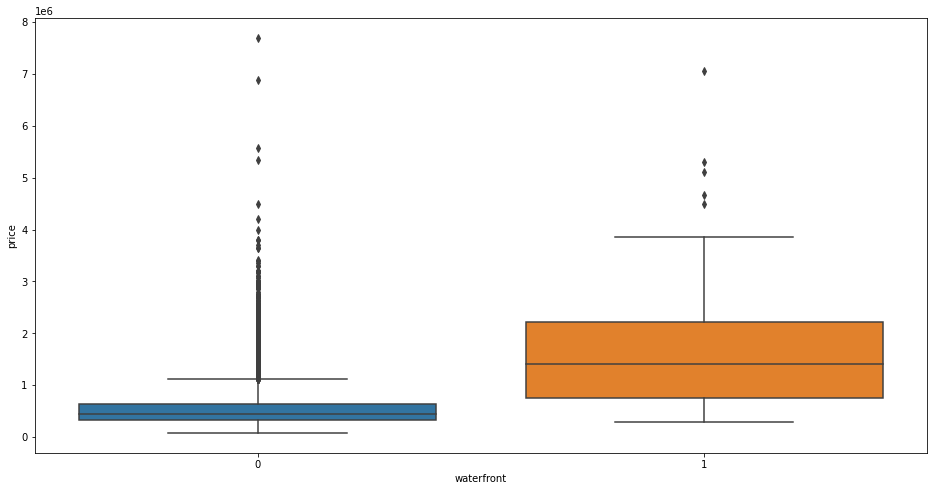

In [28]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(x=df["waterfront"], y=df["price"])

**Question 5) Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price**

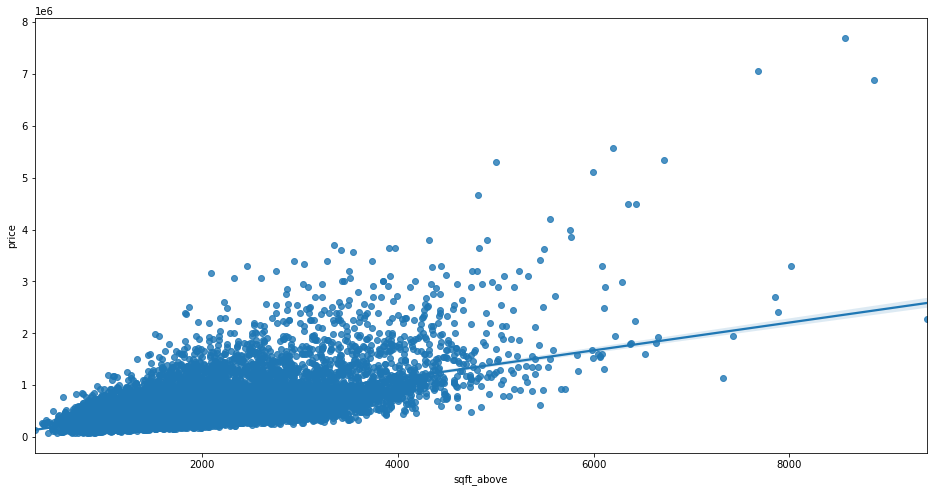

In [27]:
plt.figure(figsize=(16,8))
ax=sns.regplot(x=df["sqft_above"], y=df["price"])

**Question 6) Fit a linear regression model to predict the price using the feature 'sqft_living' then calculate the R^2**

In [43]:
X=df[[ 'sqft_living' ]]
y=df['price']
model_1=LinearRegression()
model_1.fit(X,y)
model_1.score(X,y)

0.4928532179037931

**Question 7) Fit a linear regression model to predict the 'price' using the list of features**

In [44]:
X=df[["floors","waterfront","lat","bedrooms","sqft_basement","view","bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
y=df['price']
model_2=LinearRegression()
model_2.fit(X,y)
model_2.score(X,y)

0.6577149460370746

**Question 8) Create a pipeline object that scales the data performs a polynomial transform and fits a linear regression model. Fit the object using the features in the question above, then fit the model and calculate the R^2**

In [49]:
X=df[["floors","waterfront","lat","bedrooms","sqft_basement","view","bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
y=df['price']
estimators=[('polynomial', PolynomialFeatures(2,include_bias=False)), ('linear_regression', LinearRegression())]
pipe = Pipeline(estimators)
pipe.fit(X,y)
pipe.score(X,y)

0.7513467656303361

**Question 9) Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the R^2 using the test data**

In [45]:
X=df[["floors","waterfront","lat","bedrooms","sqft_basement","view","bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
y=df['price']
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=0)
model_4=Ridge(alpha=0.1)
model_4.fit(X_train,y_train)
model_4.score(X_test,y_test)

0.6442112822840408

**Question 10) Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, setting the regularisation parameter to 0.1**

In [46]:
poly = PolynomialFeatures(2,include_bias=False)
X=df[["floors","waterfront","lat","bedrooms","sqft_basement","view","bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
y=df['price']
X_new=poly.fit_transform(X)
X_train_new,X_test_new,y_train,y_test=train_test_split(X_new,y, test_size=0.3, random_state=0)
model_5=Ridge(alpha=0.1)
model_5.fit(X_train_new,y_train)
model_5.score(X_test_new,y_test)

0.7307388996715249